In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from os.path import join

In [2]:
T = 50

In [3]:
bd = 'data'
xtrain = np.load(join(bd, 'Xtrain.npy'))
ytrain = np.load(join(bd, 'ytrain.npy'))
xtest  = np.load(join(bd, 'Xtest.npy'))
ytest  = np.load(join(bd, 'ytest.npy'))

In [4]:
def adaboost(X, Y, T):
    """
    Runs T steps of AdaBoost on train data X, given labels Y.
    Returns H, W where H is a list of weak classifiers and W is a list of respective weights.
    """
    n = X.shape[0]
    D, W, H = np.full((n,), 1/n), [], []             # initialize D uniformly
    for t in range(T):
        h = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        h.fit(X, Y, sample_weight=D)
        H.append(h)
        preds = h.predict(X)
        eps = np.dot(D, (Y != preds))
        w = 1/2 * np.log(1/eps - 1)
        W.append(w)
        D = np.multiply(D, np.exp(- w * Y * preds))  # update weights
        D = np.divide(D, sum(D))                     # normalize
    return H, W

In [5]:
def iterative_test(X, Y, H, W):
    """
    Predicts the labels of X given H and W for every time step.
    Returns a list of accuracies_i corresponding to time step i.
    """
    accuracies = []
    preds = 0
    for h, w in zip(H, W):
        preds += h.predict(X) * w
        accuracies.append(np.sum(np.sign(preds) == Y) / X.shape[0])
    return accuracies

In [6]:
H, W = adaboost(xtrain, ytrain, T)
train_accs = iterative_test(xtrain, ytrain, H, W)
test_accs = iterative_test(xtest, ytest, H, W)

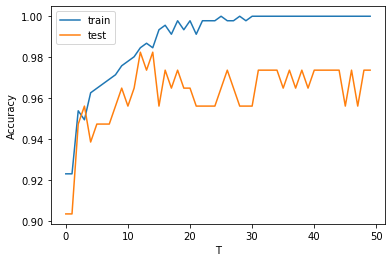

In [7]:
plt.plot(range(T), train_accs, label='train')
plt.plot(range(T), test_accs, label='test')
plt.xlabel('T')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

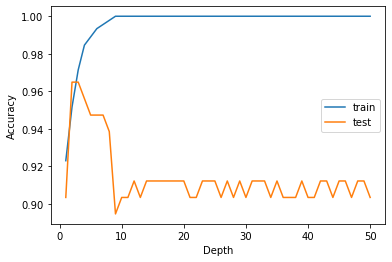

In [8]:
train_accs = []
test_accs = []
depths = range(1, 51)
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(xtrain, ytrain)
    train_acc = tree.score(xtrain, ytrain)
    test_acc = tree.score(xtest, ytest)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
plt.plot(depths, train_accs, label='train')
plt.plot(depths, test_accs, label='test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()